<a href="https://colab.research.google.com/github/Bartup/WMA/blob/main/WMA_2_Bartosz_Grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def findAll(img):
    cpimg = img
    img = cv2.medianBlur(img, 5)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(img_hsv, 350, 620, apertureSize = 5)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 90,
                                minLineLength=50, maxLineGap=5)

    #Finding corners of tray
    lowx = lines[1][0][0]
    highx = lines[1][0][0]
    lowy = lines[0][0][1]
    highy = lines[0][0][1]
    for line in lines:
        if lowx > line[0][0]:
            lowx = line[0][0]
        if highx < line[0][0]:
            highx = line[0][0]
        if lowy > line[0][1]:
            lowy = line[0][1]
        if highy < line[0][1]:
            highy = line[0][1]


    circles = cv2.HoughCircles(img_hsv, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=35, minRadius=20, maxRadius=40)
    circles = np.uint16(np.around(circles))

    arrayOfRadiuses = np.transpose(circles[0])[2]
    maxRadius = max(arrayOfRadiuses)

    biginside = 0
    bigoutside = 0
    smallinside = 0
    smalloutside = 0

    for i in circles[0, :]:
        
        #Checking if coin lays inside tray
        if i[0]>lowx and i[0]<highx and i[1]>lowy and i[1]<highy:
            if i[2] > maxRadius - 3:
                biginside += 1
                cv2.circle(cpimg, (i[0], i[1]), i[2], (255, 255, 0), 2)
            else:
                smallinside += 1
                cv2.circle(cpimg, (i[0], i[1]), i[2], (0, 255, 0), 2) 
        else:
            if i[2] > maxRadius - 3:
                bigoutside += 1
                cv2.circle(cpimg, (i[0], i[1]), i[2], (255, 255, 0), 2)
            else:
                smalloutside += 1
                cv2.circle(cpimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
            

    allMoneyInside = biginside * 5 + smallinside * 0.05
    allMoneyOutside = bigoutside * 5 + smalloutside * 0.05
    allMoney = allMoneyInside + allMoneyOutside

    print('5zl inside ', biginside)
    print('5zl outside ', bigoutside)
    print('5gr inside ', smallinside)
    print('5gr outside ', smalloutside)
    print('Sum inside ', allMoneyInside)
    print('Sum outside ', allMoneyOutside)
    print('Sum ', allMoney)

    plt.imshow(cpimg[:,:,::-1])

5zl inside  0
5zl outside  2
5gr inside  5
5gr outside  5
Sum inside  0.25
Sum outside  10.25
Sum  10.5


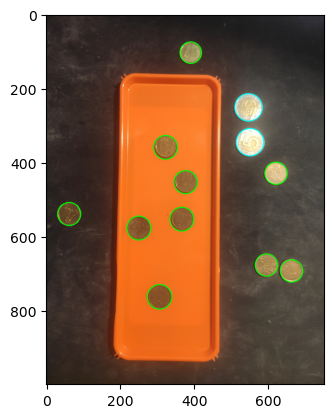

In [ ]:
image = cv2.imread("trays/tray1.jpg")
findAll(image)

5zl inside  1
5zl outside  1
5gr inside  5
5gr outside  5
Sum inside  5.25
Sum outside  5.25
Sum  10.5


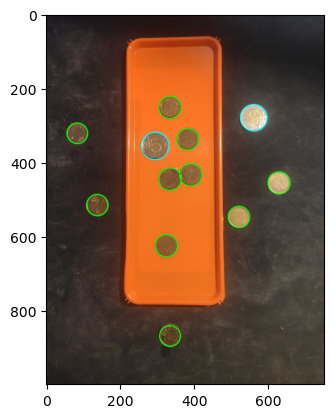

In [ ]:
image = cv2.imread("trays/tray2.jpg")
findAll(image)

5zl inside  2
5zl outside  0
5gr inside  6
5gr outside  4
Sum inside  10.3
Sum outside  0.2
Sum  10.5


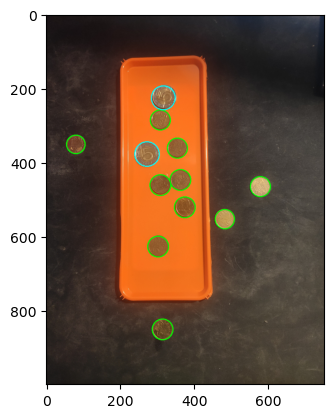

In [ ]:
image = cv2.imread("trays/tray3.jpg")
findAll(image)

5zl inside  1
5zl outside  1
5gr inside  5
5gr outside  5
Sum inside  5.25
Sum outside  5.25
Sum  10.5


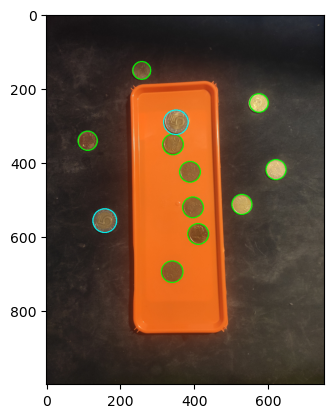

In [ ]:
image = cv2.imread("trays/tray4.jpg")
findAll(image)

5zl inside  0
5zl outside  2
5gr inside  6
5gr outside  4
Sum inside  0.3
Sum outside  10.2
Sum  10.5


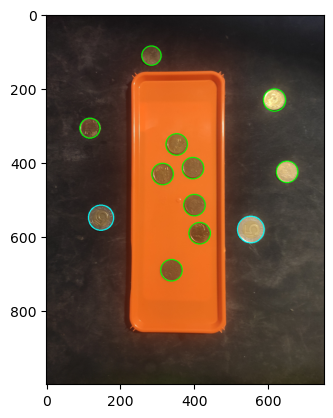

In [ ]:
image = cv2.imread("trays/tray5.jpg")
findAll(image)

5zl inside  1
5zl outside  1
5gr inside  6
5gr outside  4
Sum inside  5.3
Sum outside  5.2
Sum  10.5


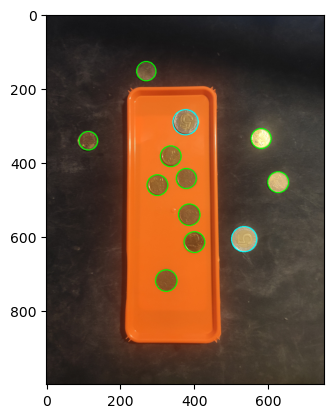

In [ ]:
image = cv2.imread("trays/tray6.jpg")
findAll(image)

5zl inside  2
5zl outside  0
5gr inside  6
5gr outside  4
Sum inside  10.3
Sum outside  0.2
Sum  10.5


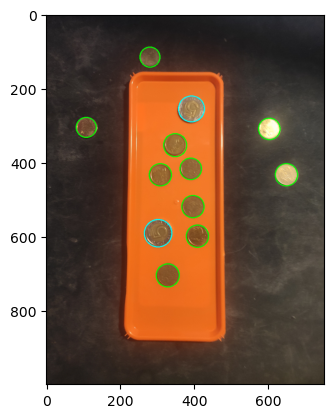

In [ ]:
image = cv2.imread("trays/tray7.jpg")
findAll(image)

5zl inside  1
5zl outside  1
5gr inside  5
5gr outside  5
Sum inside  5.25
Sum outside  5.25
Sum  10.5


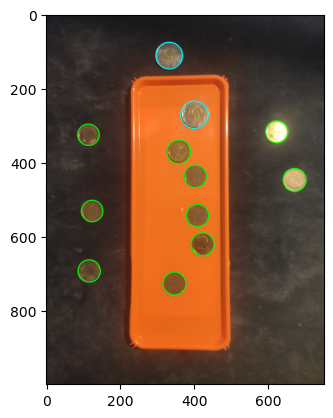

In [ ]:
image = cv2.imread("trays/tray8.jpg")
findAll(image)